In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
fish = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/Fish.csv')
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [2]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [3]:
dummies = pd.get_dummies(fish['Species'])
data = pd.concat([fish, dummies], axis=1)
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [4]:
data.drop('Species', axis=1, inplace=True)
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [5]:
data.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='object')

In [6]:
names = data.columns[1:]
features = data[names]
features.tail()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0
158,13.8,15.0,16.2,2.9322,1.8792,0,0,0,0,0,1,0


In [7]:
target = data['Weight']
target.tail()

154    12.2
155    13.4
156    12.2
157    19.7
158    19.9
Name: Weight, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [23]:
features_train, features_test, target_train, target_test = \
train_test_split(features, target, test_size=0.33, random_state=42)

In [24]:
features_train.head(), target_train.head()

(     Length1  Length2  Length3   Height   Width  Bream  Parkki  Perch  Pike  \
 69      21.2     23.0     25.8  10.3458  3.6636      0       1      0     0   
 127     41.1     44.0     46.6  12.4888  7.5958      0       0      1     0   
 27      32.7     36.0     41.5  16.5170  5.8515      1       0      0     0   
 150     10.8     11.3     12.6   1.9782  1.2852      0       0      0     0   
 124     39.8     43.0     45.2  11.9328  7.2772      0       0      1     0   
 
      Roach  Smelt  Whitefish  
 69       0      0          0  
 127      0      0          0  
 27       0      0          0  
 150      0      1          0  
 124      0      0          0  ,
 69      200.0
 127    1000.0
 27      714.0
 150       8.7
 124    1000.0
 Name: Weight, dtype: float64)

In [11]:
from sklearn.linear_model import LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(features_train, target_train)

In [27]:
target_prediction = reg.predict(features_test)
target_prediction

array([ 2.52413687e+01,  5.95421494e-01,  2.08449859e+02,  3.31665261e+02,
        2.15482994e+02,  7.53929942e+02, -7.24585071e+01,  2.53698723e+02,
        2.59678480e+02,  1.18648573e+03,  6.00206027e+02,  8.47635320e+02,
        5.37239650e+02,  1.52193053e+02,  6.78093881e+02,  8.17925786e+02,
        1.02085423e+03,  2.81460586e+02,  2.21230474e+02,  5.80928938e+02,
       -2.65982999e+01,  5.79658685e+02,  5.06143757e+02,  4.79971143e+02,
        8.14231017e+02,  9.65625735e+02,  2.18708642e+02,  3.55983349e+02,
       -1.02621031e+02, -2.80999101e+01,  5.98136370e+02, -1.80105070e+01,
       -1.04683495e+02,  7.28061602e+02,  3.58027459e+02,  1.63308996e+02,
        1.88699604e+02,  1.09828388e+02,  2.04508008e+02,  7.80041169e+02,
        6.78083828e+02,  7.28191073e+02, -7.67869255e+01,  1.79681138e+02,
        1.92874650e+02,  6.19181650e+00,  1.35603189e+02,  6.51314578e+02,
        1.35643024e+02,  7.02557771e+01,  7.20492577e+02,  4.85662042e+02,
        5.38647607e+02])

In [28]:
target_prediction = pd.Series(data=target_prediction, name="Weight_gues")
target_prediction.head()

0     25.241369
1      0.595421
2    208.449859
3    331.665261
4    215.482994
Name: Weight_gues, dtype: float64

In [30]:
target_comparition = pd.concat([target_test.reset_index(), target_prediction], axis=1)
target_comparition.head()

,index,Weight,Weight_gues
0,78,78.0,25.241369
1,155,13.4,0.595421
2,128,200.0,208.449859
3,55,270.0,331.665261
4,94,150.0,215.482994


In [31]:
target_comparition = target_comparition.set_index('index')
target_comparition

,Weight,Weight_gues
index,,
78,78.0,25.241369
155,13.4,0.595421
128,200.0,208.449859
55,270.0,331.665261
94,150.0,215.482994
29,1000.0,753.929942
147,7.0,-72.458507
51,180.0,253.698723
98,188.0,259.678480


In [34]:
final_comparision = pd.concat([target_comparition, fish['Species']], axis=1)
final_comparision[final_comparision['Weight'] > 0]

,Weight,Weight_gues,Species
78,78.0,25.241369,Perch
155,13.4,0.595421,Smelt
128,200.0,208.449859,Pike
55,270.0,331.665261,Whitefish
94,150.0,215.482994,Perch
29,1000.0,753.929942,Bream
147,7.0,-72.458507,Smelt
51,180.0,253.698723,Roach
98,188.0,259.678480,Perch
141,1250.0,1186.485729,Pike


In [35]:
reg.score(features_test, target_test)

0.9405192628555378

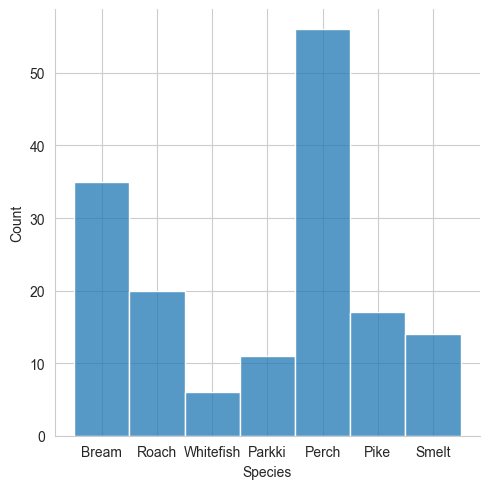

In [43]:
sns.set_style('whitegrid')
sns.displot(fish['Species'])

<AxesSubplot: xlabel='Species', ylabel='Weight'>

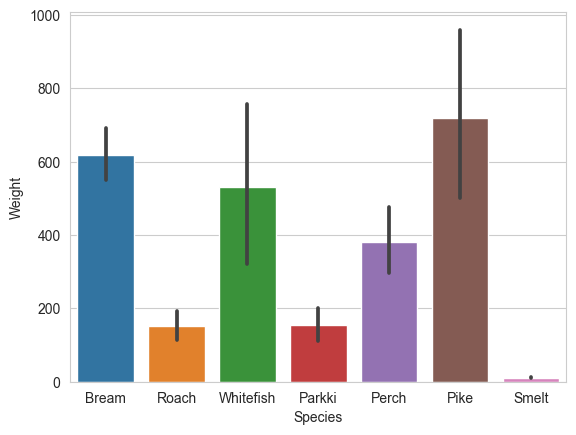

In [44]:
sns.barplot(fish, x="Species", y = "Weight")

<AxesSubplot: ylabel='count'>

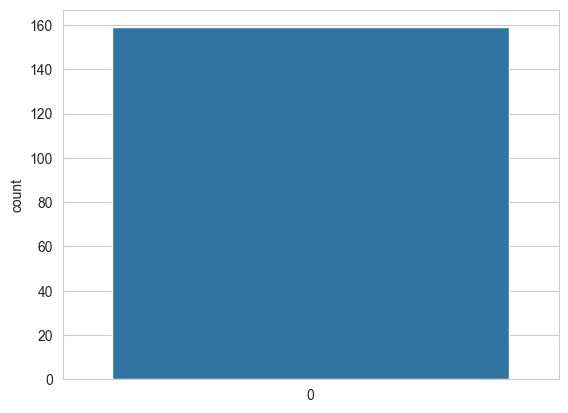

In [39]:
sns.set_style('whitegrid')
sns.countplot(fish['Weight'])

In [ ]:
sns.displot()